In [1]:
import numpy as np 
import pandas as pd  

!conda install -c anaconda seaborn -y

from sklearn import svm 

import matplotlib.pyplot as plt 
import seaborn as sns;sns.set(font_scale=1.2)  

%matplotlib inline

Solving environment: ...working... done

# All requested packages already installed.



     1      2    3     4    sum Unnamed: 5
0  201  10018  250  3046  13515        yes
1  205  10016  395  3044  13660        yes
2  257  10129  109  3251  13746        yes
3  246  10064  324  3137  13771        yes
4  117  10115  496  3094  13822        yes


In [10]:
recipies = pd.read_csv("D://ml//Machine Learning Full//Decision Tree//muffin.csv")
print(recipies.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


D:\ml\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


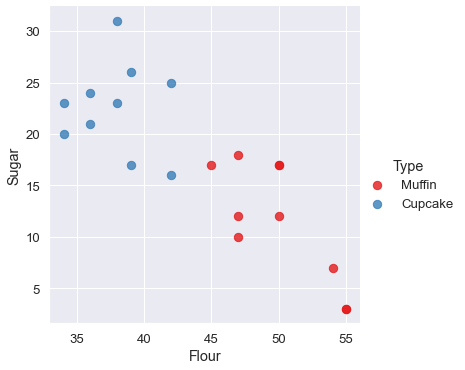

In [14]:
#plot
sns.lmplot('Flour','Sugar', data=recipies, hue='Type',palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [17]:
#format or preprocess
type_label = np.where(recipies['Type']=='Muffin',0,1)
recipies_features = recipies.columns.values[1:].tolist()
recipies_features
ingredients = recipies[['Flour','Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [18]:
model = svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(kernel='linear')

In [20]:
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30,60)
yy = a*xx - (model.intercept_[0])/w[1]

#plot

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

D:\ml\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


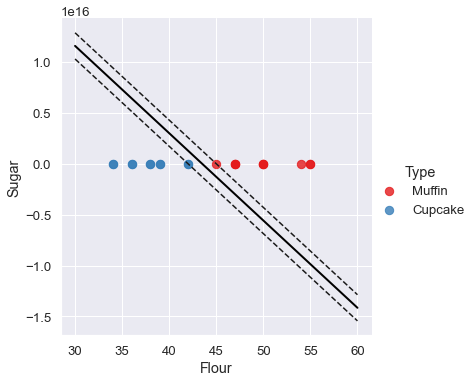

In [23]:
sns.lmplot('Flour','Sugar', data=recipies, hue='Type',palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy , linewidth=2 , color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [30]:
#prediction
def muffin_or_cup(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print("Its a muffin!")
    else:
        print("Its a cupcake!")
        
#run
muffin_or_cup(50,20)


Its a muffin!


D:\ml\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


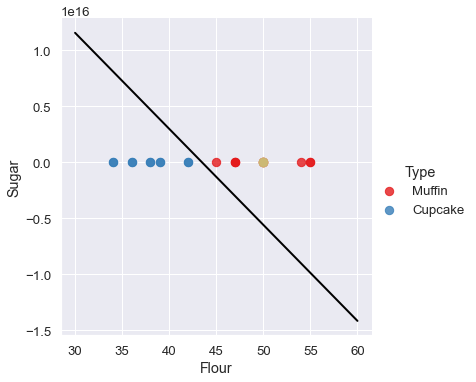

In [31]:
sns.lmplot('Flour','Sugar', data=recipies, hue='Type',palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy , linewidth=2 , color='black')
plt.plot(50,20,'yo',markersize='9')